## Preamble

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import plotly.express as px

In [2]:
# import data
data = 'final_scores.csv'
scores = pd.read_csv(data)

In [4]:
# revisar si hay valores nulos
print(scores.isnull().sum())

STUDENT       0
EVALUATION    0
COURSE        0
SCORE         0
GENDER        0
dtype: int64


In [5]:
# revisar si hay valores duplicados
print(scores.duplicated().sum())

0


In [6]:
# revisar el tipo de datos de cada columna
print(scores.dtypes)

STUDENT       object
EVALUATION    object
COURSE        object
SCORE          int64
GENDER        object
dtype: object


In [ ]:
scores.head()

,STUDENT,EVALUATION,COURSE,SCORE,GENDER
0,STUDENT1,PERIOD1,MATH,87,FEMALE
1,STUDENT2,PERIOD1,MATH,79,MALE
2,STUDENT3,PERIOD1,MATH,100,FEMALE
3,STUDENT4,PERIOD1,MATH,95,MALE
4,STUDENT5,PERIOD1,MATH,100,FEMALE


## General groups details

In [ ]:
# female and male counts
scores['GENDER'][(scores['COURSE']=='MATH')].value_counts()//4

FEMALE    19
MALE      12
Name: GENDER, dtype: int64

In [ ]:
# summary statistics per gender
scores.groupby('GENDER')['SCORE'].describe()

,count,mean,std,min,25%,50%,75%,max
GENDER,,,,,,,,
FEMALE,608.0,93.570724,10.975107,40.0,91.0,100.0,100.0,100.0
MALE,384.0,93.020833,9.619095,50.0,90.0,97.0,100.0,100.0


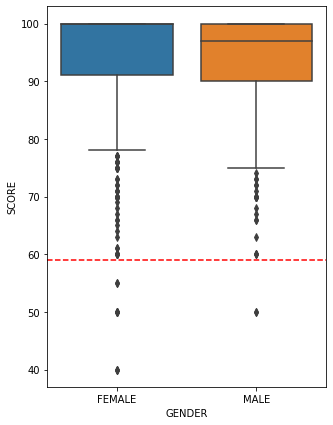

In [ ]:
plt.rcParams["figure.figsize"] = [5, 7]
plt.axhline(59, ls='--', c='red')
sns.boxplot(x='GENDER', y='SCORE', data=scores)
plt.show()

In [ ]:
# desempeño grupal semestral
scores.describe()

,SCORE
count,992.000000
mean,93.357863
std,10.469501
min,40.000000
25%,90.000000
50%,100.000000
75%,100.000000
max,100.000000


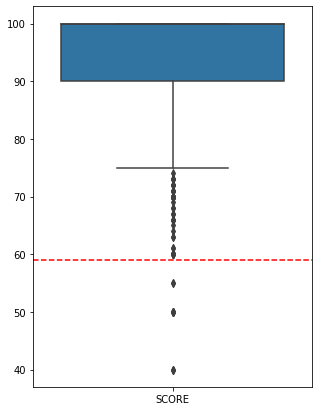

In [ ]:
plt.rcParams["figure.figsize"] = [5, 7]
plt.axhline(59, ls='--', c='red')
sns.boxplot(data=scores)
plt.show()

In [ ]:
# desempeño semestral grupal (media aritmetica) por materia 
scores.groupby('COURSE')['SCORE'].describe(
    include='all').sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
COURSE,,,,,,,,
SPORT,124.0,98.306452,5.015711,70.0,100.00,100.0,100.0,100.0
ARTS,124.0,96.895161,8.229254,60.0,100.00,100.0,100.0,100.0
HISTORY,124.0,95.862903,6.750290,50.0,95.00,98.0,100.0,100.0
LITERATURE,124.0,94.612903,9.363230,50.0,92.00,100.0,100.0,100.0
BIOLOGY,124.0,94.451613,7.561514,60.0,91.75,96.5,100.0,100.0
ENGLISH,124.0,91.379032,10.108028,50.0,85.75,95.0,100.0,100.0
MATH,124.0,89.572581,12.178332,50.0,80.00,94.0,100.0,100.0
PHYSICS,124.0,85.782258,15.055756,40.0,76.75,91.0,100.0,100.0


In [ ]:
# desempeño semestral grupal (mediana) por materia 
scores.groupby('COURSE')['SCORE'].describe(
    include='all').sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
COURSE,,,,,,,,
ARTS,124.0,96.895161,8.229254,60.0,100.00,100.0,100.0,100.0
LITERATURE,124.0,94.612903,9.363230,50.0,92.00,100.0,100.0,100.0
SPORT,124.0,98.306452,5.015711,70.0,100.00,100.0,100.0,100.0
HISTORY,124.0,95.862903,6.750290,50.0,95.00,98.0,100.0,100.0
BIOLOGY,124.0,94.451613,7.561514,60.0,91.75,96.5,100.0,100.0
ENGLISH,124.0,91.379032,10.108028,50.0,85.75,95.0,100.0,100.0
MATH,124.0,89.572581,12.178332,50.0,80.00,94.0,100.0,100.0
PHYSICS,124.0,85.782258,15.055756,40.0,76.75,91.0,100.0,100.0


In [ ]:
# variacion en desempeño semestral grupal (desviacion estandar) por materia 
scores.groupby('COURSE')['SCORE'].describe(
    include='all').sort_values('std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
COURSE,,,,,,,,
PHYSICS,124.0,85.782258,15.055756,40.0,76.75,91.0,100.0,100.0
MATH,124.0,89.572581,12.178332,50.0,80.00,94.0,100.0,100.0
ENGLISH,124.0,91.379032,10.108028,50.0,85.75,95.0,100.0,100.0
LITERATURE,124.0,94.612903,9.363230,50.0,92.00,100.0,100.0,100.0
ARTS,124.0,96.895161,8.229254,60.0,100.00,100.0,100.0,100.0
BIOLOGY,124.0,94.451613,7.561514,60.0,91.75,96.5,100.0,100.0
HISTORY,124.0,95.862903,6.750290,50.0,95.00,98.0,100.0,100.0
SPORT,124.0,98.306452,5.015711,70.0,100.00,100.0,100.0,100.0


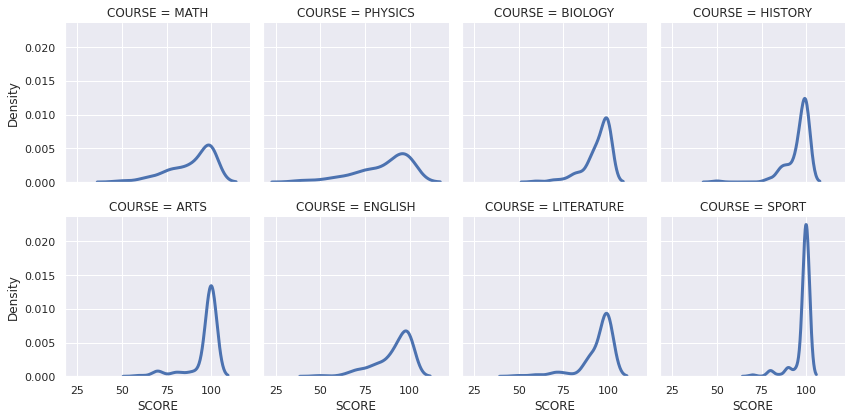

In [ ]:
# histogramas de SCOREes por materia semestral
sns.set_theme(style="darkgrid")
sns.displot(
    scores, x="SCORE", 
    col="COURSE", 
    col_wrap=4, 
    # hue="GENDER",
    # binwidth=4, 
    height=3,
    # kde=True,
    kind='kde',
    linewidth = 3
)

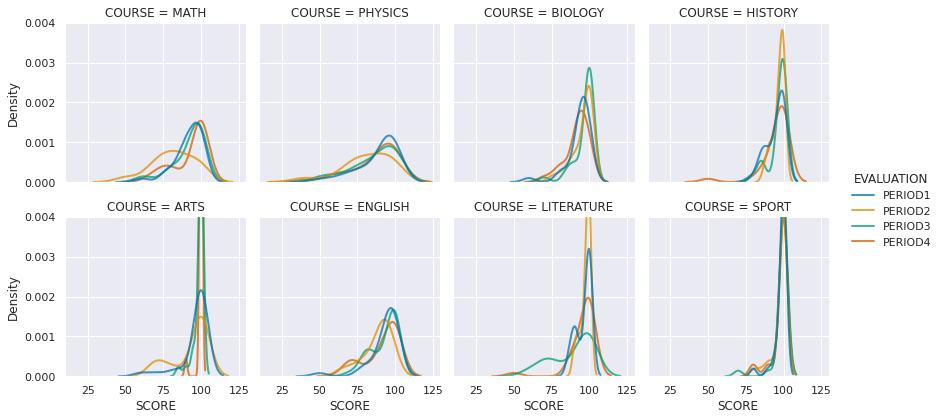

In [ ]:
# histogramas de SCOREes por materia semestral
sns.set_theme(style="darkgrid")
ax = sns.displot(
    scores, x="SCORE", col="COURSE", col_wrap=4, hue="EVALUATION",
     height=3 ,kind="kde",linewidth = 2, palette="colorblind",alpha=0.75
)
plt.ylim(0,0.004)
plt.show()

In [ ]:
fig = px.line_polar(scores.groupby('COURSE').mean().reset_index(), r='SCORE', 
                    theta='COURSE', line_close=True,markers=True,template="seaborn", width=700,
                    title='Average per course')
# fig.update_traces(fill='toself')
fig.show()

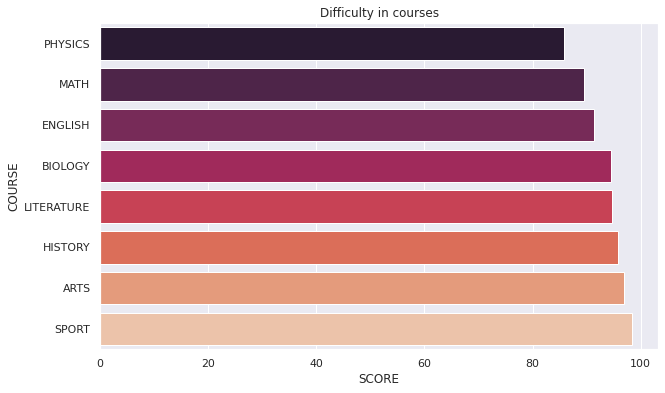

In [ ]:
# grafico de barras para promedios
plt.rcParams["figure.figsize"] = [10, 6]
# plt.axvline(90, ls='-', c='green', linewidth=3)
# plt.axvline(80, ls='-', c='red', linewidth=3)
sns.barplot(data=scores.groupby('COURSE').mean().reset_index().sort_values('SCORE'), x="SCORE", 
            y="COURSE", palette="rocket").set(title='Difficulty in courses')
plt.show()

In [ ]:
# evolucion promedios por materia
evolucion_COURSEs = scores.groupby(['COURSE','EVALUATION']).mean().reset_index()

In [ ]:
num_COURSEs = len(evolucion_COURSEs[evolucion_COURSEs['EVALUATION']=='EVALUATION1'].index) 

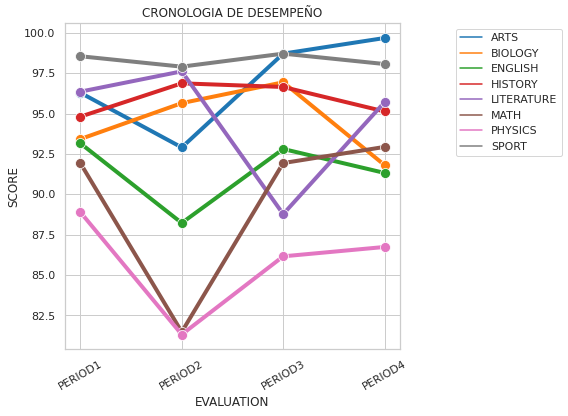

In [ ]:
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = [6, 6]
plt.xticks(rotation=30)
ax = sns.lineplot(data=evolucion_COURSEs, 
             x="EVALUATION", y="SCORE",hue='COURSE', 
             marker="o", markersize=10,linewidth = 4, palette="tab10")
# ax.legend(bbox_to_anchor = (1.5, 1),fontsize = 12).get_lines()[0].set_linewidth(4)
ax.legend(bbox_to_anchor = (1.5, 1))
ax.set(title='CRONOLOGIA DE DESEMPEÑO')
plt.show()

In [ ]:
fig = px.line_polar(scores.groupby(['COURSE','EVALUATION']).mean().reset_index(), 
                    r='SCORE', theta='COURSE',color='EVALUATION', 
                    line_close=True,markers=True,template="seaborn", width=700,
                    title='Evolución EVALUATIONes')
# fig.update_traces(fill='toself')
fig.show()

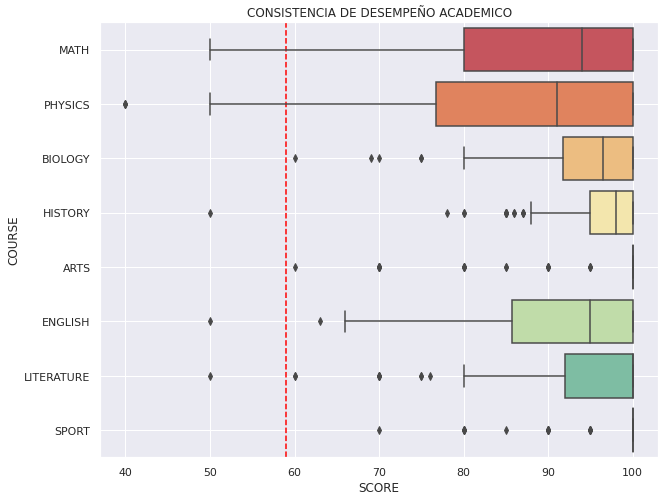

In [ ]:
# consistencia en el desempeño semestral por COURSE
sns.set()
plt.rcParams["figure.figsize"] = [10, 8]
fig, ax = plt.subplots()

# grouped = scores.loc[:,['STUDENT', 'SCORE']] \
#     .groupby(['STUDENT']) \
#     .median() \
#     .sort_values(by='SCORE')

plt.style.use('seaborn-deep')
# plt.rcParams["figure.figsize"] = [10, 15]
plt.yticks(np.arange(min(scores['SCORE']), 
                     max(scores['SCORE'])+1, 10))
plt.axvline(59, ls='--', c='red')
sns.boxplot(y='COURSE', x='SCORE', 
            data=scores, palette="Spectral").set(title='CONSISTENCIA DE DESEMPEÑO ACADEMICO')
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
plt.show()

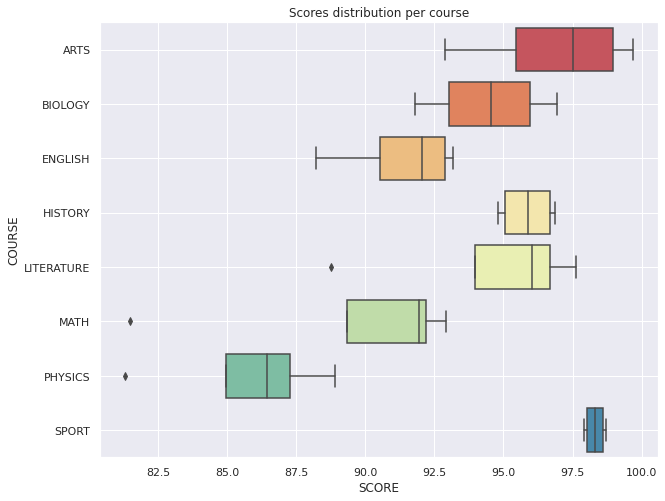

In [ ]:
# consistencia en el desempeño semestral por COURSE (promedios)
sns.set()
plt.rcParams["figure.figsize"] = [10, 8]
fig, ax = plt.subplots()
plt.style.use('seaborn-deep')
plt.yticks(np.arange(min(scores['SCORE']), 
                     max(scores['SCORE'])+1, 10))
sns.boxplot(y='COURSE', x='SCORE', 
            data=scores.groupby(['COURSE','EVALUATION']).mean().reset_index(), 
            palette="Spectral").set(title='Scores distribution per course')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

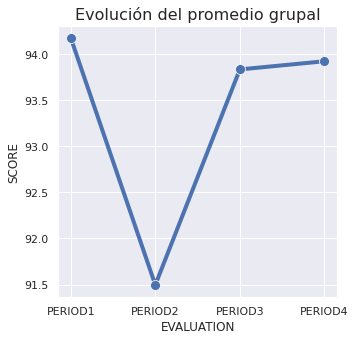

In [ ]:
# evolucion promedio grupal(media aritmetica). Los atipicos
# impactan mas y desvia el promedio
plt.rcParams["figure.figsize"] = [5, 5]
sns.lineplot(data=scores.groupby('EVALUATION').mean().reset_index(), 
             x="EVALUATION", y="SCORE", marker="o", markersize=10,linewidth = 4)
plt.title(label='Evolución del promedio grupal',
          fontsize=16)
plt.show()

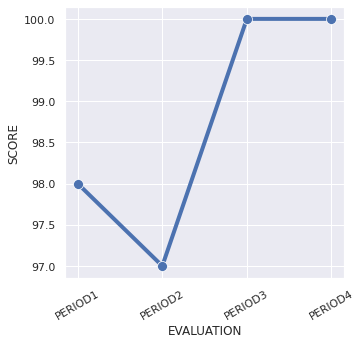

In [ ]:
# evolucion promedio grupal(mediana)
# los atipicos no afectan el promedio
plt.rcParams["figure.figsize"] = [5, 5]
plt.xticks(rotation=30)
sns.lineplot(data=scores.groupby('EVALUATION').median().reset_index(), 
             x="EVALUATION", y="SCORE", marker= 'o', markersize=10,linewidth = 4)
plt.show()

[Text(0.5, 1.0, 'Scores distribution per period')]

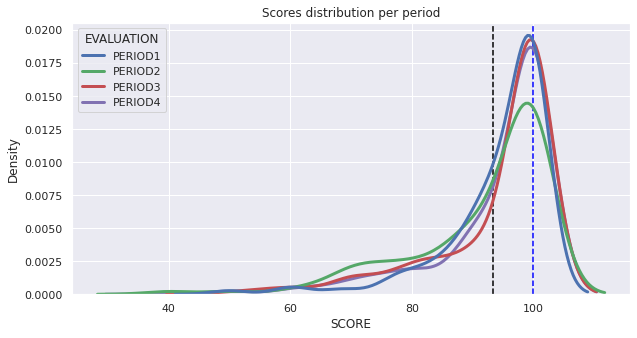

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.axvline(scores['SCORE'].mean(), ls='--', c='black')
plt.axvline(scores['SCORE'].median(), ls='--', c='blue')
sns.kdeplot(data=scores, x="SCORE", 
            hue="EVALUATION",
            linewidth = 3).set(title='Scores distribution per period')

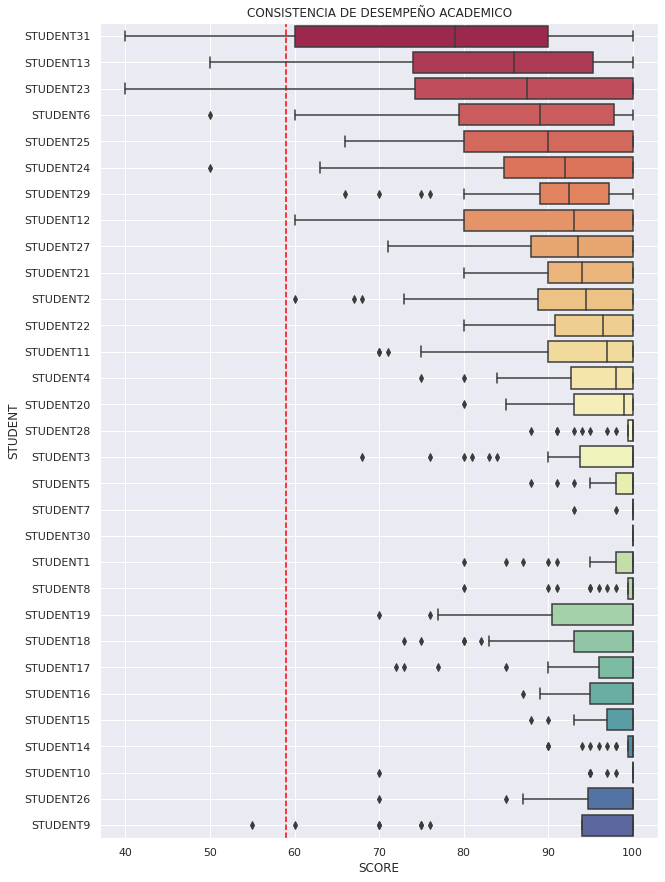

In [ ]:
# consistencia en el desempeño semestral por alumn@
sns.set()
plt.rcParams["figure.figsize"] = [10, 15]
fig, ax = plt.subplots()

grouped = scores.loc[:,['STUDENT', 'SCORE']] \
    .groupby(['STUDENT']) \
    .median() \
    .sort_values(by='SCORE')

plt.style.use('seaborn-deep')
# plt.rcParams["figure.figsize"] = [10, 15]
plt.yticks(np.arange(min(scores['SCORE']), 
                     max(scores['SCORE'])+1, 10))
plt.axvline(59, ls='--', c='red')
sns.boxplot(y='STUDENT', x='SCORE', 
            data=scores, 
            palette="Spectral", 
            order=grouped.index).set(title='CONSISTENCIA DE DESEMPEÑO ACADEMICO')
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
plt.show()

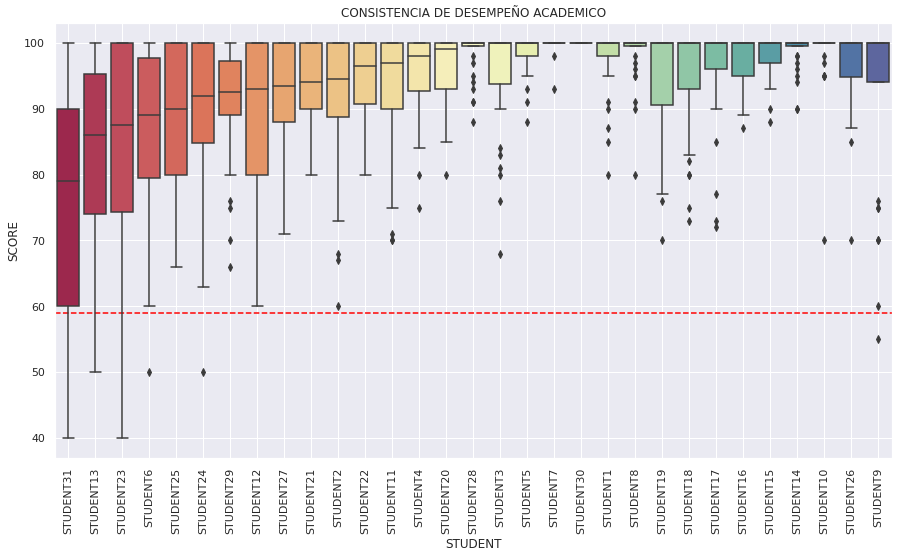

In [ ]:
# consistencia en el desempeño semestral por alumn@
sns.set()
plt.rcParams["figure.figsize"] = [15, 8]
fig, ax = plt.subplots()

grouped = scores.loc[:,['STUDENT', 'SCORE']] \
    .groupby(['STUDENT']) \
    .median() \
    .sort_values(by='SCORE')

plt.style.use('seaborn-deep')
# plt.rcParams["figure.figsize"] = [10, 15]
plt.yticks(np.arange(min(scores['SCORE']), 
                     max(scores['SCORE'])+1, 10))
plt.axhline(59, ls='--', c='red')
sns.boxplot(x='STUDENT', y='SCORE', 
            data=scores, palette="Spectral", order=grouped.index).set(title='CONSISTENCIA DE DESEMPEÑO ACADEMICO')
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
plt.xticks(rotation=90)
plt.show()

In [ ]:
# creando dataframe para promedios finales
# promedio semestral por alumn@
promedios_semestral = scores.groupby('STUDENT')['SCORE'].mean().reset_index()

[Text(0.5, 1.0, 'DISTRIBUCION DE PROMEDIOS')]

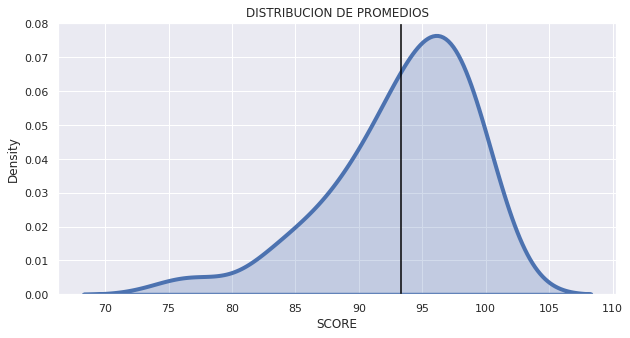

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.axvline(promedios_semestral['SCORE'].mean(), ls='-', c='black')
sns.kdeplot(data=promedios_semestral, x="SCORE", 
            fill=True,linewidth = 4).set(title='DISTRIBUCION DE PROMEDIOS')

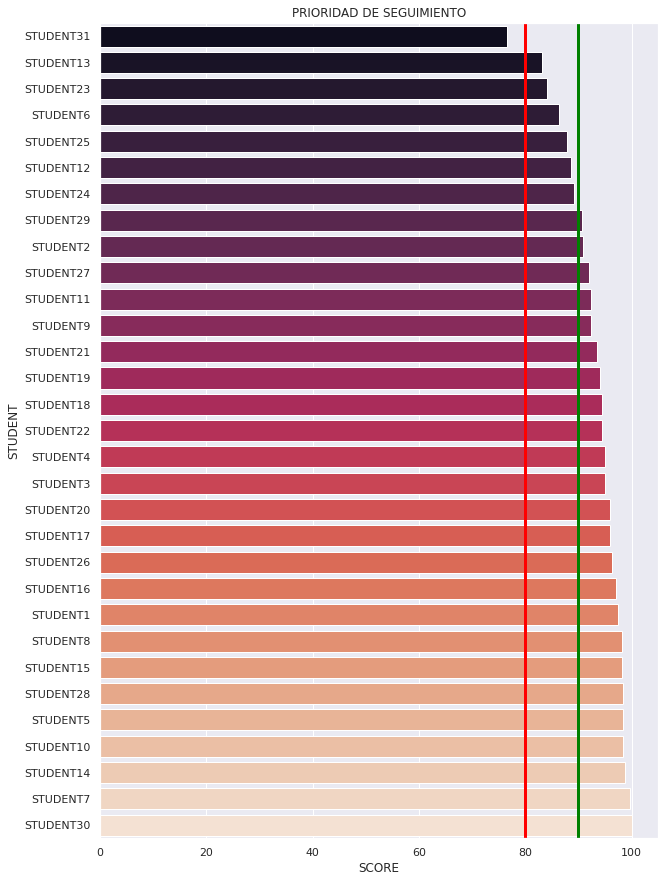

In [ ]:
# grafico de barras para promedios
plt.rcParams["figure.figsize"] = [10, 15]
plt.axvline(90, ls='-', c='green', linewidth=3)
plt.axvline(80, ls='-', c='red', linewidth=3)
sns.barplot(data=promedios_semestral.sort_values('SCORE'), x="SCORE", 
            y="STUDENT", 
            palette="rocket").set(title='PRIORIDAD DE SEGUIMIENTO')
plt.show()

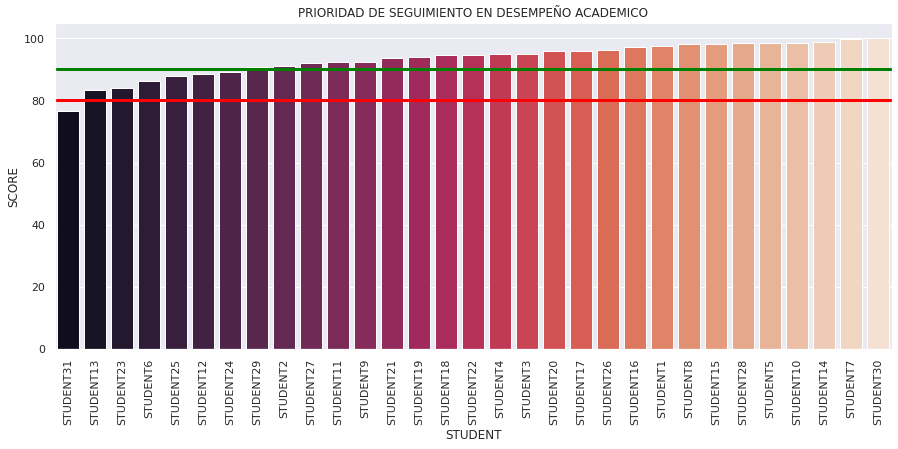

In [ ]:
# grafico de barras para promedios
plt.rcParams["figure.figsize"] = [15, 6]
plt.axhline(90, ls='-', c='green', linewidth=3)
plt.axhline(80, ls='-', c='red', linewidth=3)
sns.barplot(data=promedios_semestral.sort_values('SCORE'), y="SCORE", 
            x="STUDENT", palette="rocket").set(title='PRIORIDAD DE SEGUIMIENTO EN DESEMPEÑO ACADEMICO')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# radar de promedios finales
fig = px.line_polar(promedios_semestral.sort_values('SCORE',ascending=False), r='SCORE', theta='STUDENT', 
                    line_close=True,markers=True,template="seaborn", width=700,
                    title='Promedios Semestrales de Alumn@s')
# fig.update_traces(fill='toself')
fig.update_traces(
                  mode="lines+markers", line_color='gray',
                  marker=dict(color='black', size=6, symbol='square'))
fig.show()

In [ ]:
fig = px.line_polar(scores.groupby(['STUDENT','EVALUATION']).mean().reset_index(), 
                    r='SCORE', theta='STUDENT',color='EVALUATION', 
                    line_close=True,markers=True,template="seaborn", width=700,
                    title='Evolución EVALUATIONes')
# fig.update_traces(fill='toself')
fig.show()

In [ ]:
fig = px.scatter_polar(scores.groupby(['STUDENT','EVALUATION']).mean().sort_values('SCORE',ascending=False).reset_index(), 
                    r='SCORE', theta='STUDENT',color='EVALUATION', 
                    template="seaborn", width=700, opacity=0.7, size="SCORE",size_max=8,
                    title='Evolución EVALUATIONes')
fig.show()

In [ ]:
# matriz de correlacion, head map
# corrmat = scores.corr()
# mask = np.zeros_like(corrmat)
# mask[np.triu_indices_from(mask)] = True
# plt.rcParams["figure.figsize"] = [5, 5]
# hm = sns.heatmap(corrmat, 
#                  annot=True, 
#                  square=True, 
#                  fmt='.2f', 
#                  mask=mask,
#                  vmax=1,
#                  vmin=0,
#                  cmap= 'coolwarm')
# plt.show()

In [ ]:
# promedios entre 80 y 90
# promedios_semestral[(promedios_semestral['SCORE'] > 79) & (promedios_semestral['SCORE'] < 90)].sort_values('SCORE',ascending=False).STUDENT

In [ ]:
# promedios por debajo de 80
# promedios_semestral[promedios_semestral['SCORE'] < 80].sort_values('SCORE',ascending=False)

In [ ]:
# se crea dataframe con promedios de l@s alumn@s en cada materia
avg_alumno_COURSE = scores.groupby(['STUDENT', 'COURSE']).mean().reset_index()
# avg_alumno_COURSE.head()

In [ ]:
# alumn@s con COURSE reprobada por promedio
avg_alumno_COURSE[avg_alumno_COURSE['SCORE']<60]

,STUDENT,COURSE,SCORE
126,STUDENT23,PHYSICS,57.0
198,STUDENT31,PHYSICS,54.0


## Situacion particular de alumn@

In [ ]:
# lista de alumnos (identificador)
segundo_A = list(scores[(scores['EVALUATION']=='EVALUATION1') & (scores['COURSE']=='MATH')]['STUDENT'])
# lista alumnos con promedio bajo
lista_alumnos = list(promedios_semestral[(promedios_semestral['SCORE'] < 80)].sort_values('SCORE',ascending=False).STUDENT)

In [ ]:
# for nombre in lista_alumnos:
#   alumno_scores = avg_alumno_COURSE[avg_alumno_COURSE['STUDENT']==nombre]
#   plt.rcParams["figure.figsize"] = [10, 5]
#   sns.barplot(data=alumno_scores.sort_values('SCORE'), x="SCORE", 
#               y="COURSE", palette="rocket").set(title=nombre)
#   plt.axvline(59, ls='--', c='red', linewidth=2)
#   plt.axvline(90, ls='--', c='green', linewidth=2)
#   plt.axvline(70, ls='--', c='orange', linewidth=2)
#   plt.show()

In [ ]:
nombre = 'STUDENT31'	
# nombre = 'RAMIREZ-LOPEZ'	
# nombre = 'FONTES-LOPEZ'	
# nombre = 'ACUÑA-RASCON'	
# nombre = 'BRAMBILLA-IBARRA'	
# nombre = 'VALENZUELA-CARRILLO'	
# nombre = 'RODRIGUEZ-SANCHEZ'
# nombre = 'FLORES-SOTO'
# nombre = 'SAAVEDRA-ALVARADO'
# nombre = 'GARCIA-ACEDO'
# nombre = 'CASILLAS-RIVERA'	
alumno_scores = scores[scores['STUDENT']==nombre]

In [ ]:
alumno_scores.groupby('COURSE')['SCORE'].describe(include='all').sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
COURSE,,,,,,,,
SPORT,4.0,98.75,2.500000,95.0,98.75,100.0,100.00,100.0
ENGLISH,4.0,92.75,6.601767,85.0,88.75,93.0,97.00,100.0
ARTS,4.0,77.50,15.000000,60.0,67.50,80.0,90.00,90.0
HISTORY,4.0,76.00,17.981472,50.0,71.00,82.5,87.50,89.0
BIOLOGY,4.0,75.50,7.047458,69.0,69.75,75.0,80.75,83.0
LITERATURE,4.0,72.25,20.532495,50.0,57.50,73.0,87.75,93.0
MATH,4.0,65.75,13.073510,50.0,57.50,68.0,76.25,77.0
PHYSICS,4.0,54.00,9.695360,40.0,51.25,57.5,60.25,61.0


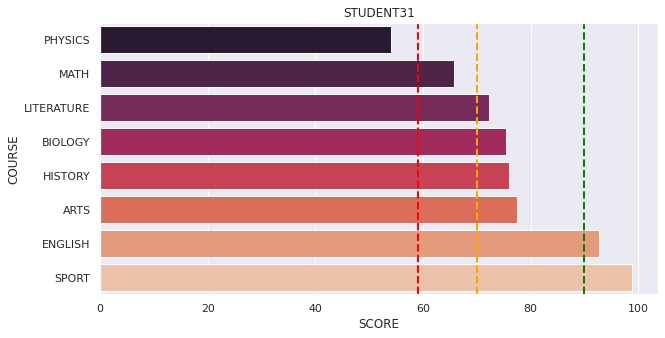

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
sns.barplot(data=alumno_scores.groupby('COURSE').mean().reset_index().sort_values('SCORE'), x="SCORE", 
            y="COURSE", palette="rocket", ci=None).set(title=nombre)
plt.axvline(59, ls='--', c='red', linewidth=2)
plt.axvline(90, ls='--', c='green', linewidth=2)
plt.axvline(70, ls='--', c='orange', linewidth=2)
plt.show()

[Text(0.5, 1.0, 'STUDENT31')]

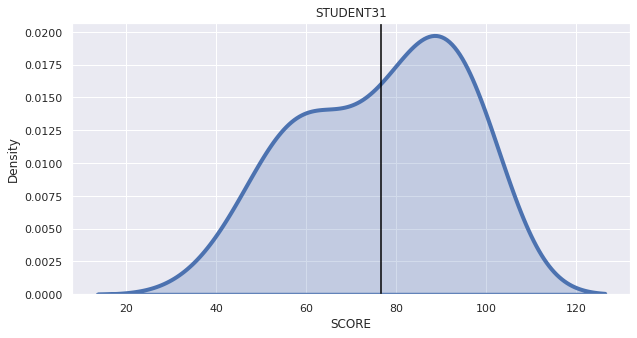

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.axvline(alumno_scores['SCORE'].mean(), ls='-', c='black')
sns.kdeplot(data=alumno_scores, x="SCORE", 
            fill=True,linewidth = 4).set(title=nombre)

[Text(0.5, 1.0, 'STUDENT31')]

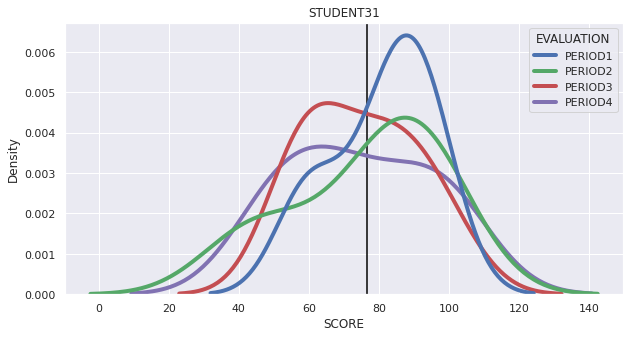

In [ ]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.axvline(alumno_scores['SCORE'].mean(), ls='-', c='black')
sns.kdeplot(data=alumno_scores, x="SCORE", hue="EVALUATION", 
            fill=False,linewidth = 4).set(title=nombre)

In [ ]:
fig = px.line_polar(alumno_scores.groupby(['COURSE','EVALUATION']).mean().reset_index(), 
                    r='SCORE', theta='COURSE',color='EVALUATION', 
                    line_close=True,markers=True,template='presentation', width=700,
                    title=nombre)
fig.show()

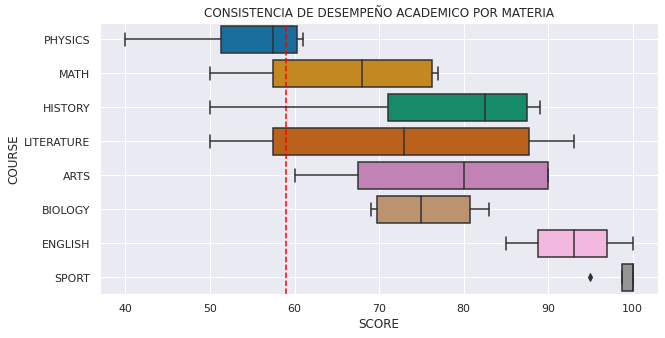

In [ ]:
# consistencia en el desempeño semestral por alumn@
sns.set()
plt.rcParams["figure.figsize"] = [10, 5]
fig, ax = plt.subplots()

plt.style.use('seaborn-deep')
plt.yticks(np.arange(min(alumno_scores['SCORE']), 
                     max(alumno_scores['SCORE'])+1, 10))
plt.axvline(59, ls='--', c='red')
# plt.axvline(70, ls='--', c='orange')
# plt.axvline(80, ls='--', c='yellow')
# plt.axvline(90, ls='--', c='green')
sns.boxplot(y='COURSE', x='SCORE', 
            data=alumno_scores.sort_values('SCORE'), palette="colorblind").set(title='CONSISTENCIA DE DESEMPEÑO ACADEMICO POR MATERIA')
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
plt.show()

## EVALUATION I

In [ ]:
EVALUATION='EVALUATION1'
scores_EVALUATION1 = scores[scores['EVALUATION']==EVALUATION]
# scores_EVALUATION1.head()

ValueError: ignored

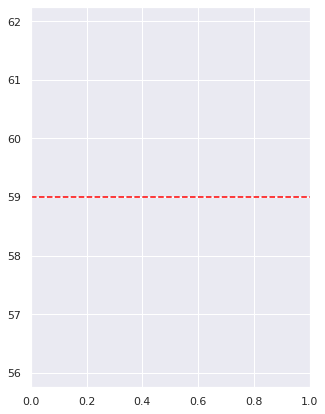

In [ ]:
plt.rcParams["figure.figsize"] = [5, 7]
plt.axhline(59, ls='--', c='red')
sns.boxplot(x='GENDER', y='SCORE', data=scores_EVALUATION1)
plt.show()

In [ ]:
scores_EVALUATION1.describe()

,CALIFICACION
count,341.000000
mean,94.096774
std,8.981976
min,50.000000
25%,91.000000
50%,98.000000
75%,100.000000
max,100.000000


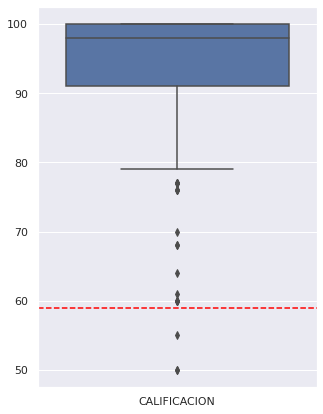

In [ ]:
plt.rcParams["figure.figsize"] = [5, 7]
plt.axhline(59, ls='--', c='red')
sns.boxplot(data=scores_EVALUATION1)
plt.show()

In [ ]:
# desempeño semestral grupal (media aritmetica) por materia 
scores_EVALUATION1.groupby('COURSE')['SCORE'].describe(include='all').sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
ASIGNATURA,,,,,,,,
DEPORTE,31.0,98.548387,4.121801,80.0,100.0,100.0,100.0,100.0
LITERATURA,31.0,96.354839,4.882270,86.0,92.0,100.0,100.0,100.0
ARTES,31.0,96.290323,9.658135,60.0,100.0,100.0,100.0,100.0
FE,31.0,94.806452,12.676538,55.0,100.0,100.0,100.0,100.0
HISTORIA,31.0,94.806452,5.996773,80.0,90.0,96.0,100.0,100.0
BIOLOGIA,31.0,93.419355,8.040623,60.0,92.5,96.0,98.0,100.0
CC,31.0,93.419355,6.800854,80.0,86.5,96.0,100.0,100.0
CDC,31.0,93.419355,6.800854,80.0,86.5,96.0,100.0,100.0
INGLES,31.0,93.161290,10.149209,50.0,91.5,96.0,100.0,100.0


In [ ]:
# desempeño semestral grupal (mediana) por materia 
scores_EVALUATION1.groupby('COURSE')['SCORE'].describe(include='all').sort_values('50%', ascending=False)

,count,mean,std,min,25%,50%,75%,max
ASIGNATURA,,,,,,,,
ARTES,31.0,96.290323,9.658135,60.0,100.0,100.0,100.0,100.0
DEPORTE,31.0,98.548387,4.121801,80.0,100.0,100.0,100.0,100.0
FE,31.0,94.806452,12.676538,55.0,100.0,100.0,100.0,100.0
LITERATURA,31.0,96.354839,4.882270,86.0,92.0,100.0,100.0,100.0
BIOLOGIA,31.0,93.419355,8.040623,60.0,92.5,96.0,98.0,100.0
CC,31.0,93.419355,6.800854,80.0,86.5,96.0,100.0,100.0
CDC,31.0,93.419355,6.800854,80.0,86.5,96.0,100.0,100.0
HISTORIA,31.0,94.806452,5.996773,80.0,90.0,96.0,100.0,100.0
INGLES,31.0,93.161290,10.149209,50.0,91.5,96.0,100.0,100.0


In [ ]:
# variacion en desempeño semestral grupal (desviacion estandar) por materia 
scores_EVALUATION1.groupby('COURSE')['SCORE'].describe(include='all').sort_values('std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
ASIGNATURA,,,,,,,,
FISICA,31.0,88.903226,13.156380,50.0,83.0,94.0,100.0,100.0
FE,31.0,94.806452,12.676538,55.0,100.0,100.0,100.0,100.0
INGLES,31.0,93.161290,10.149209,50.0,91.5,96.0,100.0,100.0
ARTES,31.0,96.290323,9.658135,60.0,100.0,100.0,100.0,100.0
MATEMATICAS,31.0,91.935484,9.139422,61.0,88.0,94.0,100.0,100.0
BIOLOGIA,31.0,93.419355,8.040623,60.0,92.5,96.0,98.0,100.0
CC,31.0,93.419355,6.800854,80.0,86.5,96.0,100.0,100.0
CDC,31.0,93.419355,6.800854,80.0,86.5,96.0,100.0,100.0
HISTORIA,31.0,94.806452,5.996773,80.0,90.0,96.0,100.0,100.0


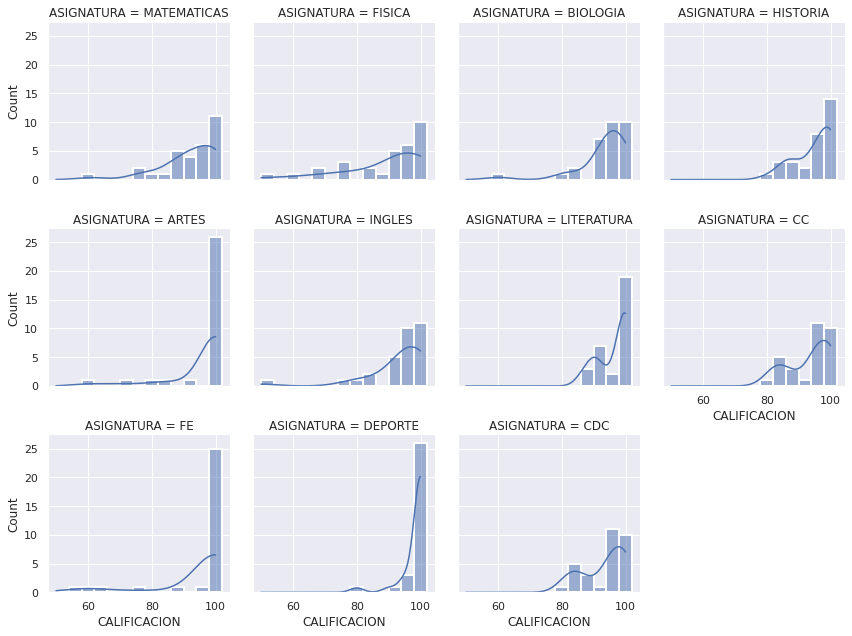

In [ ]:
# histogramas de SCOREes por materia semestral
sns.set_theme(style="darkgrid")
sns.displot(
    scores_EVALUATION1, x="SCORE", 
    col="COURSE", 
    col_wrap=4, 
    # hue="GENDER",
    binwidth=4, 
    height=3,
    kde=True,
    linewidth = 2
)

In [ ]:
fig = px.line_polar(scores_EVALUATION1.groupby('COURSE').mean().reset_index(), r='SCORE', 
                    theta='COURSE', line_close=True,markers=True,template="seaborn")
fig.show()

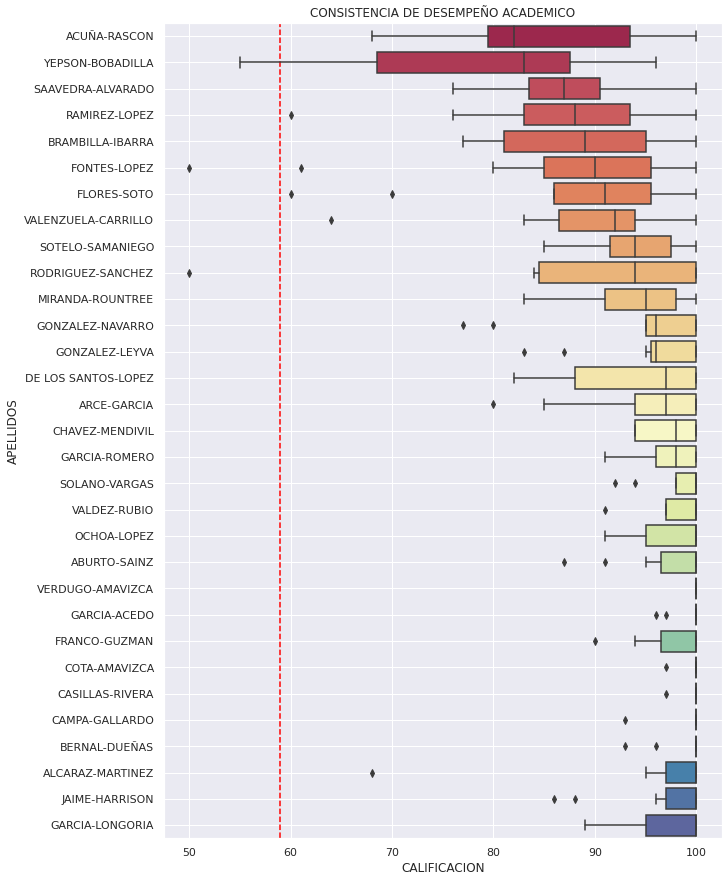

In [ ]:
# consistencia en el desempeño semestral por alumn@
# sns.set()
plt.rcParams["figure.figsize"] = [10, 15]
fig, ax = plt.subplots()

grouped = scores_EVALUATION1.loc[:,['STUDENT', 'SCORE']] \
    .groupby(['STUDENT']) \
    .median() \
    .sort_values(by='SCORE')

plt.style.use('seaborn-deep')

plt.yticks(np.arange(min(scores_EVALUATION1['SCORE']), 
                     max(scores_EVALUATION1['SCORE'])+1, 10))
plt.axvline(59, ls='--', c='red')
sns.boxplot(y='STUDENT', x='SCORE', 
            data=scores_EVALUATION1, palette="Spectral", order=grouped.index).set(title='CONSISTENCIA DE DESEMPEÑO ACADEMICO')
ax.yaxis.grid(True) # Hide the horizontal gridlines
ax.xaxis.grid(True) # Show the vertical gridlines
plt.show()

In [ ]:
promedios_EVALUATION = scores_EVALUATION1.groupby('STUDENT')['SCORE'].mean().reset_index()

[Text(0.5, 1.0, 'DISTRIBUCION DE PROMEDIOS')]

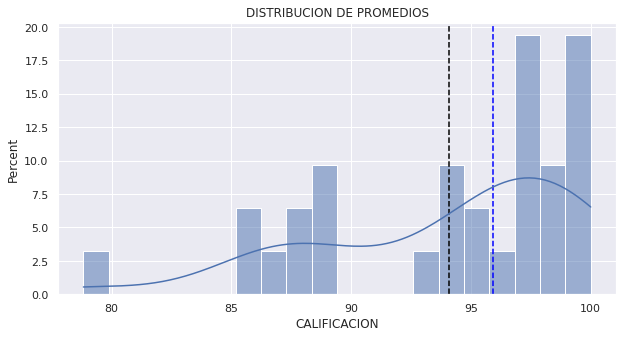

In [ ]:
# distribucion de promedios finales
plt.rcParams["figure.figsize"] = [10, 5]
plt.axvline(promedios_EVALUATION['SCORE'].mean(), ls='--', c='black')
plt.axvline(promedios_EVALUATION['SCORE'].median(), ls='--', c='blue')
sns.histplot(data=promedios_EVALUATION, x="SCORE", bins=20, 
             multiple="stack", stat='percent', kde=True).set(title='DISTRIBUCION DE PROMEDIOS')

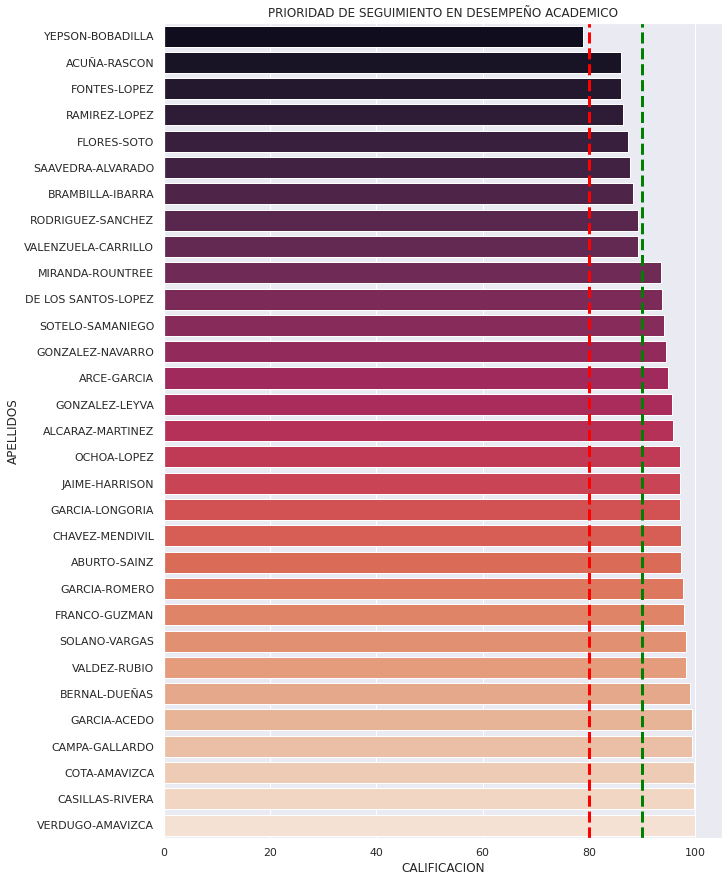

In [ ]:
# grafico de barras para promedios
plt.rcParams["figure.figsize"] = [10, 15]
plt.axvline(90, ls='--', c='green', linewidth=3)
plt.axvline(80, ls='--', c='red', linewidth=3)
# plt.axhline(8.5, ls='--', c='green', linewidth=3)
# plt.axhline(0.5, ls='--', c='red', linewidth=3)
sns.barplot(data=promedios_EVALUATION.sort_values('SCORE'), x="SCORE", 
            y="STUDENT", palette="rocket").set(title='PRIORIDAD DE SEGUIMIENTO EN DESEMPEÑO ACADEMICO')
plt.show()

## EVALUATION II

## EVALUATION III

## EVALUATION IV